In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json(r"C:\Users\lasth\Desktop\jupyter_folder_main\all files for jupyter, pandas\train.json")

In [3]:
# 'id' column represents recipe id.
print(df.shape)
df.head()

(39774, 3)


,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [4]:
# Let's add another column to see how many ingredients in each recipe.
df["num_ingredients"] = df['ingredients'].apply(lambda x: len(x))
df.head()

,id,cuisine,ingredients,num_ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12
3,22213,indian,"[water, vegetable oil, wheat, salt]",4
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20


In [8]:
# number of all different unique cuisines
df['cuisine'].unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

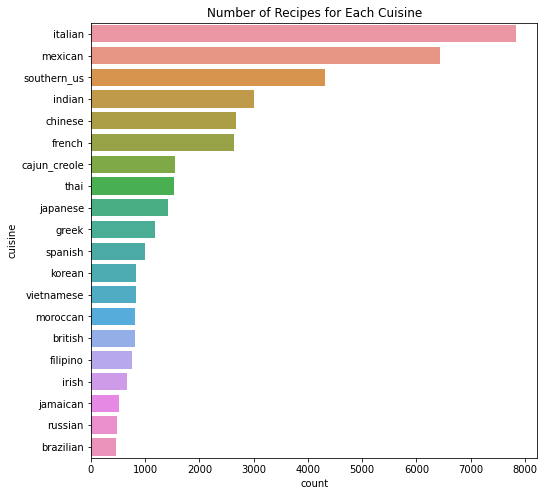

In [7]:
plt.figure(figsize=(8, 8))
plt.title('Number of Recipes for Each Cuisine')

sns.countplot(y=df['cuisine'], order=df['cuisine'].value_counts().index)

plt.show()

In [9]:
# let's group data by 'cuisine' and calculate average number of ingredients for each cuisine
grouped_cuisine = df.groupby('cuisine').agg({'num_ingredients': 'mean'}). \
                     reset_index().sort_values('num_ingredients', ascending=False). \
                     rename(columns={'num_ingredients': 'average_num_ingredients'})
grouped_cuisine.head()

,cuisine,average_num_ingredients
14,moroccan,12.909866
7,indian,12.705961
19,vietnamese,12.675152
2,cajun_creole,12.617076
18,thai,12.545809


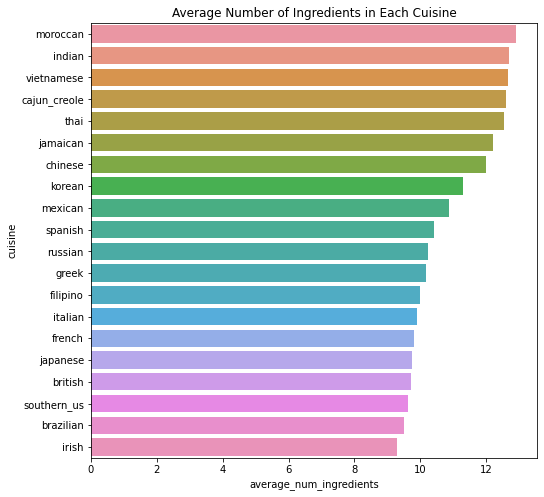

In [10]:
plt.figure(figsize=(8, 8))
plt.title('Average Number of Ingredients in Each Cuisine')

sns.barplot(data=grouped_cuisine, y='cuisine', x='average_num_ingredients')

plt.show()

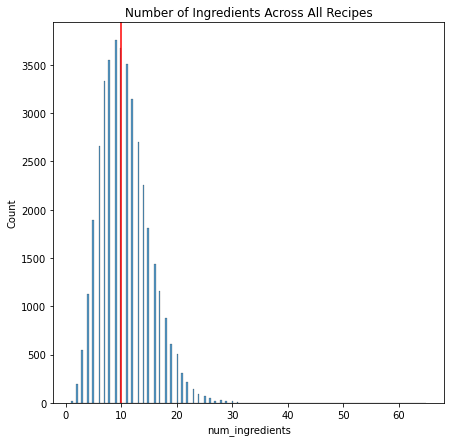

In [11]:
# Plotting a histogram to show number of ingredients distribution.
plt.figure(figsize=(7, 7))
plt.title('Number of Ingredients Across All Recipes')

sns.histplot(df['num_ingredients'])
plt.axvline(df['num_ingredients'].median(), 0, 1, color='red')

plt.show()

In [12]:
# Now let's find total occurrences of each ingredient in a DataFrame.
# For that we will run through ingredients and create a dictionary to store counts of ingredients.

dict1 = {}
for i in df['ingredients']:
    for j in i:
        if j not in dict1:
            dict1[j] = 1
        dict1[j] += 1

In [13]:
# all unique ingredients in a Dataset.
len(dict1)

6714

In [14]:
# Just another way to find the number of individual ingredients.
len(df['ingredients'].explode().unique())

6714

In [15]:
# Sorting the dictionary by its values. From highest to lowest.
dict1 = {k: v for k, v in sorted(dict1.items(), key=lambda item: item[1], reverse=True)}

In [16]:
# Creating a series out of our dictionary just to visualise it.
df_dict = pd.Series(dict1)
df_dict.head()

salt         18050
onions        7973
olive oil     7973
water         7458
garlic        7381
dtype: int64

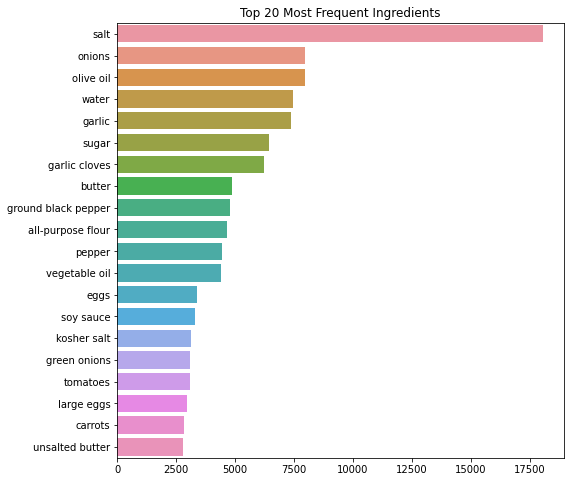

In [17]:
plt.figure(figsize=(8, 8))
           
sns.barplot(x=df_dict.values[:20], y=df_dict.index[:20])

plt.title("Top 20 Most Frequent Ingredients")
plt.show()

In [18]:
# Let's find the same top ingredients but for each cuisine respectively.
# For that we will initialize 20 dictionaries, because we have 20 cuisines in total.
dict1 = {}
dict2 = {}
dict3 = {}
dict4 = {}
dict5 = {}
dict6 = {}
dict7 = {} 
dict8 = {}
dict9 = {}
dict10 = {}
dict11 = {}
dict12 = {}
dict13 = {}
dict14 = {}
dict15 = {}
dict16 = {}
dict17 = {} 
dict18 = {}
dict19 = {}
dict20 = {}

In [19]:
list_of_dict = [dict1, dict2, dict3, dict4, dict5, dict6, dict7, dict8, dict9, dict10, dict11, dict12, dict13,
               dict14, dict15, dict16, dict17, dict18, dict19, dict20]
n = 0
for cuisine in df['cuisine'].unique():
    for i in df[df['cuisine'] == cuisine]['ingredients']:
        for j in i:
            if j not in list_of_dict[n]:
                list_of_dict[n][j] = 1
                
            list_of_dict[n][j] += 1
    n += 1

In [20]:
# We have created each dictionary with its own cuisine ingredients in it.

## Most common ingredients in each cuisine

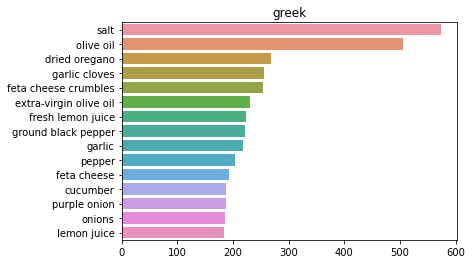

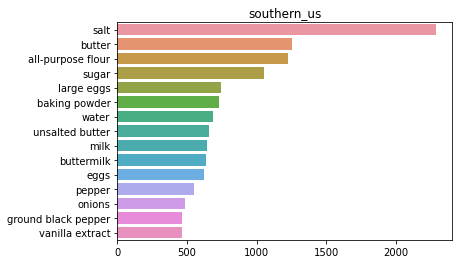

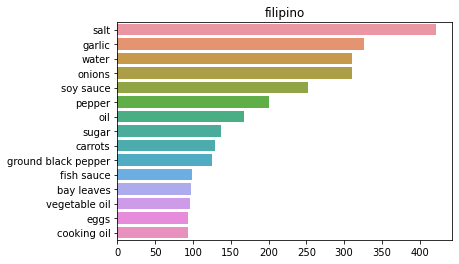

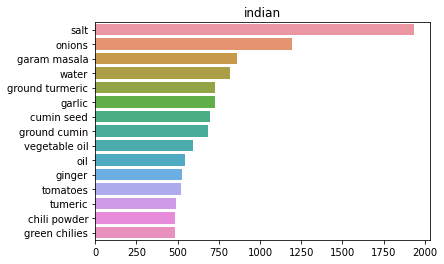

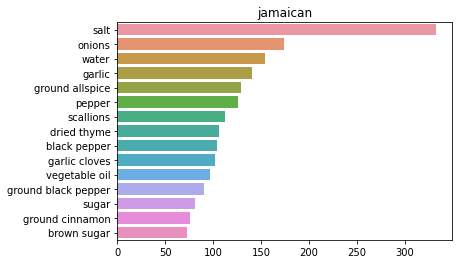

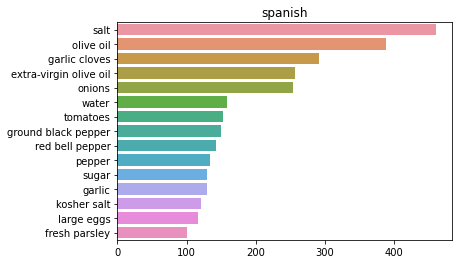

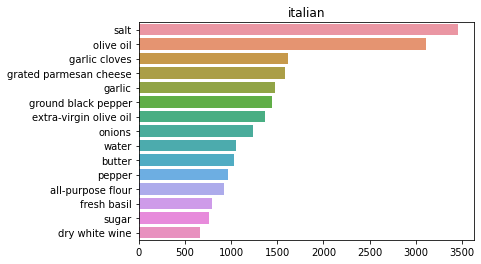

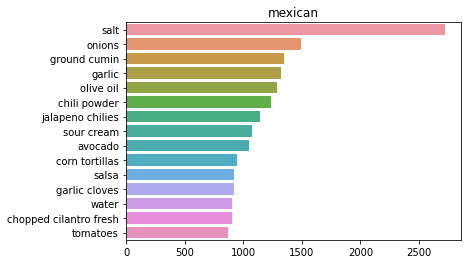

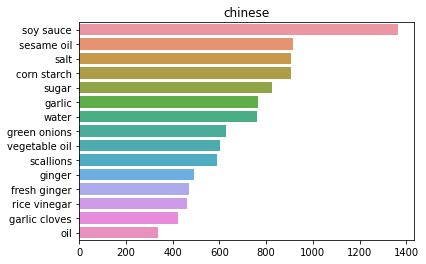

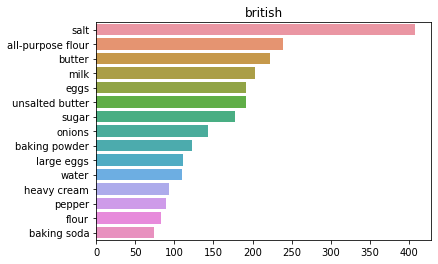

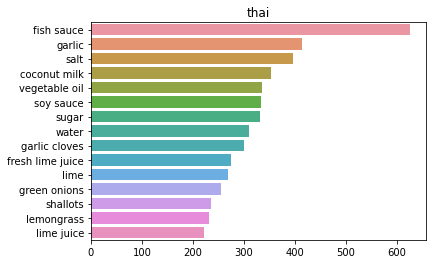

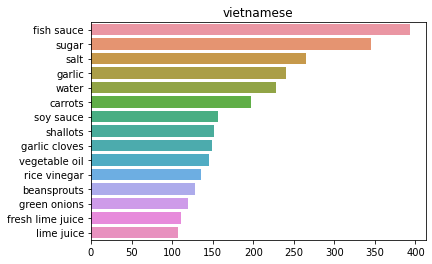

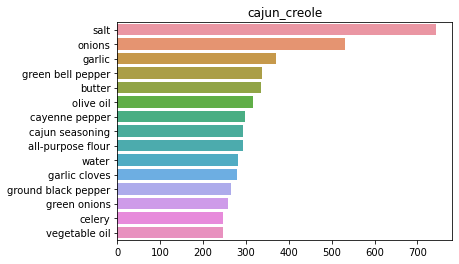

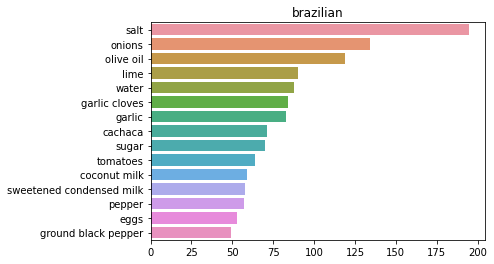

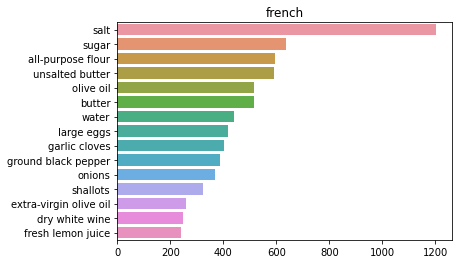

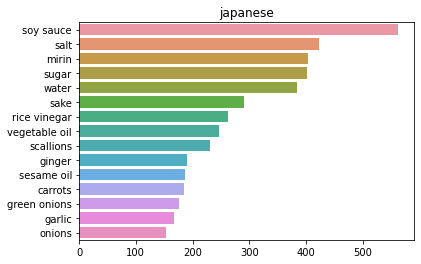

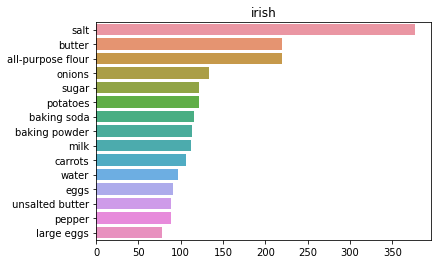

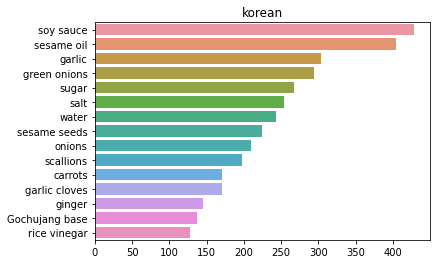

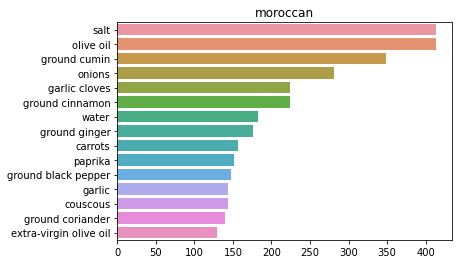

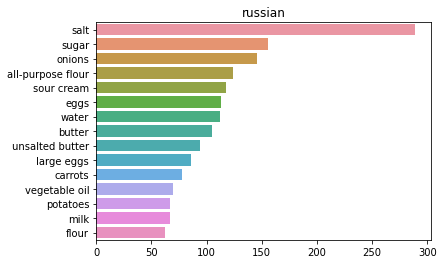

In [21]:
for i in range(len(list_of_dict)):
    temp_series = pd.Series(list_of_dict[i]).sort_values(ascending=False)
    
    sns.barplot(x=temp_series.values[:15], y=temp_series.index[:15])
    plt.title(df['cuisine'].unique()[i])
    plt.show()

In [22]:
# Salt appears quite often, we might get rid of it in the future.

In [22]:
# We need to get rid of list
df['ingredients'] = df['ingredients'].apply(lambda x: ','.join(x))
df.head()

,id,cuisine,ingredients,num_ingredients
0,10259,greek,"romaine lettuce,black olives,grape tomatoes,ga...",9
1,25693,southern_us,"plain flour,ground pepper,salt,tomatoes,ground...",11
2,20130,filipino,"eggs,pepper,salt,mayonaise,cooking oil,green c...",12
3,22213,indian,"water,vegetable oil,wheat,salt",4
4,13162,indian,"black pepper,shallots,cornflour,cayenne pepper...",20


In [23]:
# implementing Machine Learning steps.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df['ingredients'], df['cuisine'], test_size = 0.2, random_state = 42)

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [27]:
# We want to count phrases, not just separate words. For that we customize our 'tokenizer'.
clf = Pipeline([
    ('vectorizer', CountVectorizer(tokenizer=lambda txt: txt.split(','))),
    ('lr', LogisticRegression(max_iter=230, multi_class='ovr'))
])

In [28]:
%%time
clf.fit(X_train, y_train)

Wall time: 10 s


Pipeline(steps=[('vectorizer',
                 CountVectorizer(tokenizer=<function <lambda> at 0x0000016168DDD550>)),
                ('lr', LogisticRegression(max_iter=230, multi_class='ovr'))])

In [29]:
%%time
clf.score(X_test, y_test)

Wall time: 143 ms


0.7829038340666248

In [30]:
# Logistic Regression gave us 0.7829 accuracy score.

In [32]:
clf = Pipeline([
    ('vectorizer', CountVectorizer(tokenizer=lambda txt: txt.split(','))),
    ('rf', RandomForestClassifier(criterion='entropy'))
]) 

In [33]:
%%time
clf.fit(X_train, y_train)

Wall time: 4min 32s


Pipeline(steps=[('vectorizer',
                 CountVectorizer(tokenizer=<function <lambda> at 0x00000161698ADA60>)),
                ('mn', RandomForestClassifier(criterion='entropy'))])

In [34]:
%%time
clf.score(X_test, y_test)

Wall time: 917 ms


0.688497800125707

In [35]:
# Random Forest Classifier performed worse, only 0.6884 accuracy score.

In [40]:
clf = Pipeline([
    ('vectorizer', CountVectorizer(tokenizer=lambda txt: txt.split(','))),
    ('svc', SVC(kernel='rbf', C=5, gamma=0.1))
]) 

In [41]:
%%time
clf.fit(X_train, y_train)

Wall time: 3min 39s


Pipeline(steps=[('vectorizer',
                 CountVectorizer(tokenizer=<function <lambda> at 0x00000161697C9430>)),
                ('mn', SVC(C=5, gamma=0.1))])

In [42]:
%%time
clf.score(X_test, y_test)

Wall time: 48 s


0.7852922690131993

In [43]:
# SVC(kernel='rbf', C=5, gamma=0.1) performed the best with the score of 0.78529

In [120]:
# Converting categorical column 'cuisine' into numeric representation is not needed.

In [52]:
clf = Pipeline([
    ('vectorizer', CountVectorizer(tokenizer=lambda txt: txt.split(','))),
    ('mn', MultinomialNB())
])

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7402891263356379

In [53]:
# MultinomialNB is algo good and very fast: 0.7402

### Conclusion.
SVC(kernel='rbf', C=5, gamma=0.1) performed the best with the score of 0.78529  and Wall time for training was: 3min 39s 

LogisticRegression(max_iter=230, multi_class='ovr') gave us 0.7829 accuracy score. Wall time: 10 s 

MultinomialNB performed with 0.7402 accuracy score. 

RandomForestClassifier(criterion='entropy') gave only 0.6884 accuracy score. Wall time: 4min 32s